# MOwNiT – interpolacja

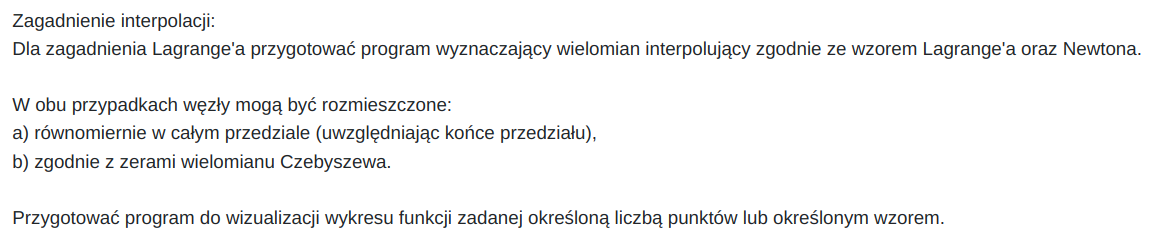

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.special import roots_chebyt

In [2]:
def even_distribution(start, stop):
    return np.arange(start, stop+0.1, step=0.1)

In [3]:
def chebyshev_distribution(points):
    x, y = roots_chebyt(points)
    return x

## Visualization

In [4]:
def visualize_scipy(x, y, x_new, function):
    plt.scatter(x, y, label="data", color="red")
    plt.plot(x_new, function(x_new), label = "Lagrange")
    plt.legend()
    plt.show()

In [5]:
def visualize(x, y, x_new, function):
    plt.scatter(x, y, label="data", color="red")
    plt.plot(x_new, function(x_new, x, y), label = "Lagrange")
    plt.legend()
    plt.show()

In [6]:
# example function and points
x = np.array([0, 1, 2, 3, 4, 5])
y = x**3 + 2*x**2 + 5

## Lagrange'a Polynomial Interpolation

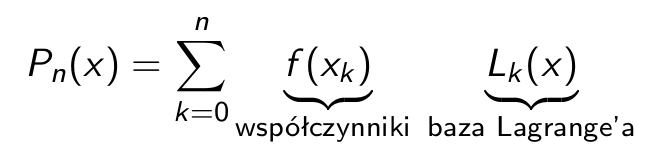

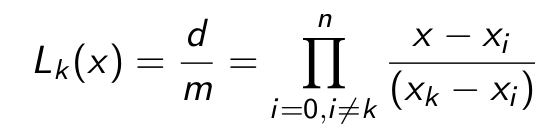

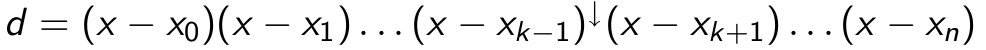
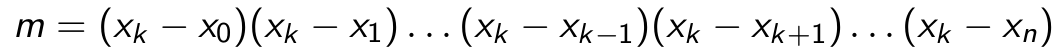

### using scipy

In [7]:
def lagrange_scipy(x, y):
    poly = lagrange(x, y)
    x_new = even_distribution(x.min(), x.max())
    visualize_scipy(x, y, x_new, poly)

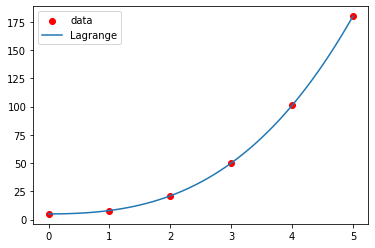

In [8]:
lagrange_scipy(x, y)

### own implementation

In [9]:
def calculate_Lk(X, xk, k, x_points):
    d = m = 1
    for i in range(len(x_points)):
        if i != k:
            d *= (X - x_points[i])
    for i in range(len(x_points)):
        if i != k:
            m *= (xk - x_points[i])
    return d/m

def lagrange_interpolation(X, x, y):
    result = 0
    for k in range(len(x)):
        result += y[k] * calculate_Lk(X, x[k], k, x)
    return result

In [10]:
def lagrange_own_implementation(x, y):
    x_new_dist = even_distribution(x.min(), x.max())
    x_new_chebyt = chebyshev_distribution(len(x))
    visualize(x, y, x_new_dist, lagrange_interpolation)
    visualize(x_new_chebyt, y, x_new_chebyt, lagrange_interpolation)

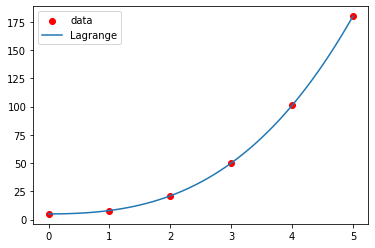

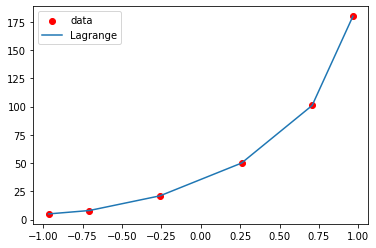

In [11]:
lagrange_own_implementation(x, y)

## Newton’s Polynomial Interpolation

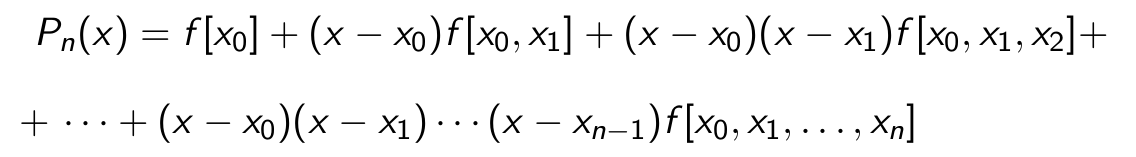

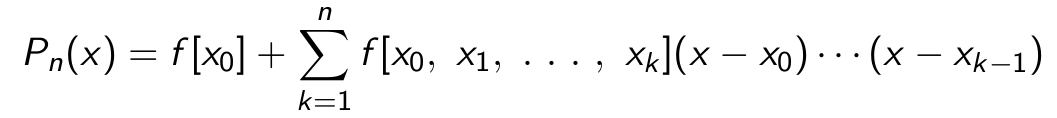

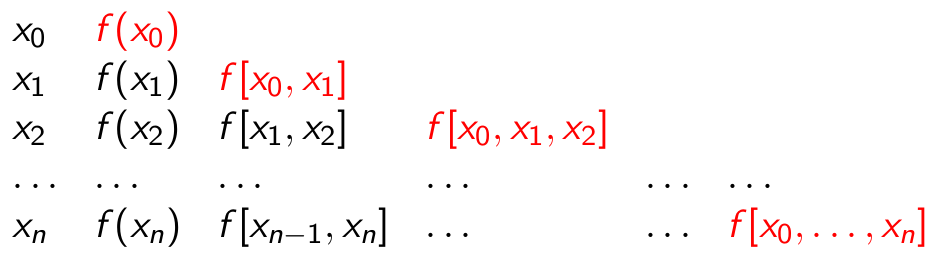

### own implementation

In [12]:
def newton_interpolation(X, x, y):
    table_of_dd = [[None for _ in range(len(x))] for _ in range(len(x))]
    y_values = [None for _ in range(len(x))]
    
    for i in range(len(x)):
        table_of_dd[i][0] = y[i]
    for j in range(1, len(x)):
        for i in range(len(x)-j):
            table_of_dd[i][j] = (table_of_dd[i+1][j-1] - table_of_dd[i][j-1])/(x[i+j]-x[i])
            
    xterm = 1
    y_values[0] = table_of_dd[0][0]
    for i in range(1, len(x)):
        xterm *= (X - x[i-1])
        y_values[i] = y_values[i-1] + table_of_dd[0][i]*xterm
        
    return y_values[-1]

In [13]:
def newton_own_implementation(x, y):
    x_new_dist = even_distribution(x.min(), x.max())
    x_new_chebyt = chebyshev_distribution(len(x))
    visualize(x, y, x_new_dist, newton_interpolation)
    visualize(x_new_chebyt, y, x_new_chebyt, newton_interpolation)

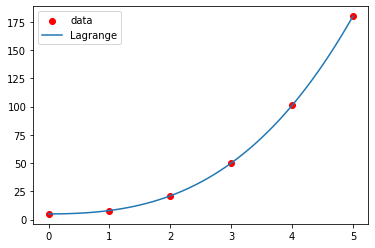

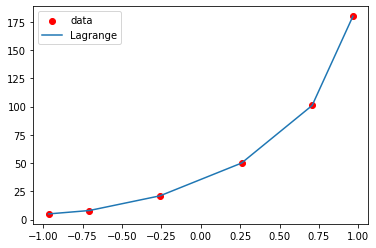

In [14]:
newton_own_implementation(x, y)